# Find Distribution

By Alberto Valdés 

**Mail 1:** anvaldes@uc.cl 

**Mail 2:** alberto.valdes.gonzalez.96@gmail.com

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import time
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import image as mpimg

In [3]:
def display_img(name, a, b):
    plt.figure(figsize = (a, b))
    image = mpimg.imread(name)
    plt.imshow(image)
    plt.axis('off')
    plt.show()

**AIC (Akaike Information Criterion):** 

$ \boxed{AIC = 2 \cdot k - 2 \cdot ln(L)} $

$ k $ is the number of parameters and $ L $ is the maximum value of the likelihood.

As lower is AIC, better is the fit.

**BIC (Bayesian Information Criterion):** 

$ \boxed{BIC = k \cdot ln(n) - 2 \cdot ln(L)} $

$ k $ is the number of parameters, $ n $ number of data and $ L $ is the maximum value of the likelihood.

As lower is BIC, better is the fit.

**KS statistic**

Statistic to measure how similar are two distributions. Meanwhile statistic are greater the **p_value** are lower.

If the **p-value** < 5% we can reject the null hypothesis (both data have the same distributions).

As greater is the p-value, better is the fit.

In [4]:
start = time.time()

# 1. Load dataset

In [5]:
df = pd.read_csv('HeightWeight.csv')

In [6]:
df = df[['Height(Inches)', 'Weight(Pounds)']]

# 2. Histogram of data

### i. Height

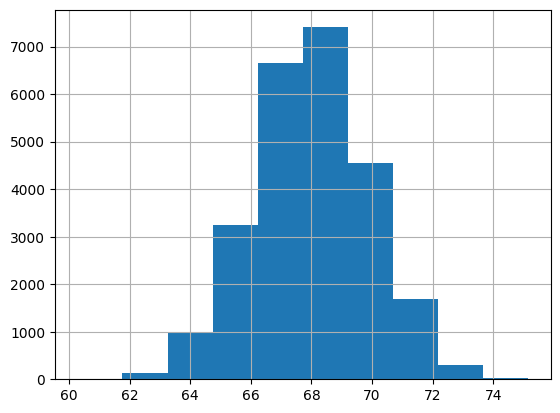

In [7]:
df['Height(Inches)'].hist()
plt.show()

### ii. Weight

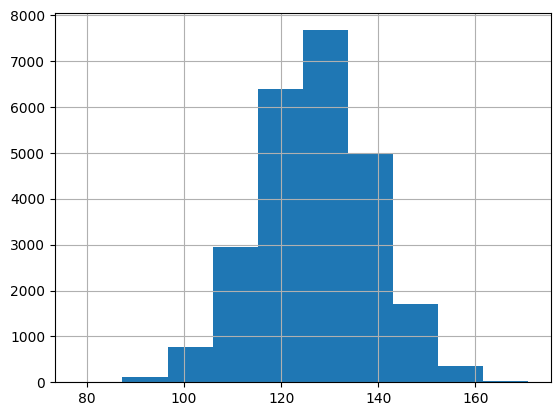

In [8]:
df['Weight(Pounds)'].hist()
plt.show()

# 3. Find the best distribution

In [9]:
!pip install -q fitter

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
from fitter import Fitter, get_common_distributions, get_distributions

### i. Height

In [11]:
height = df["Height(Inches)"].values

In [12]:
f = Fitter(height, distributions=get_common_distributions())
f.fit()

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
norm,0.001538,828.260851,844.514113,inf,0.002993,9.780726e-01
gamma,0.001547,830.585100,854.964993,inf,0.003378,9.368979e-01
lognorm,0.002230,844.603492,868.983385,inf,0.008761,4.283402e-02
exponpow,0.059169,960.351128,984.731022,inf,0.066682,4.294069e-97
cauchy,0.077043,698.891296,715.144558,inf,0.073638,2.451128e-118


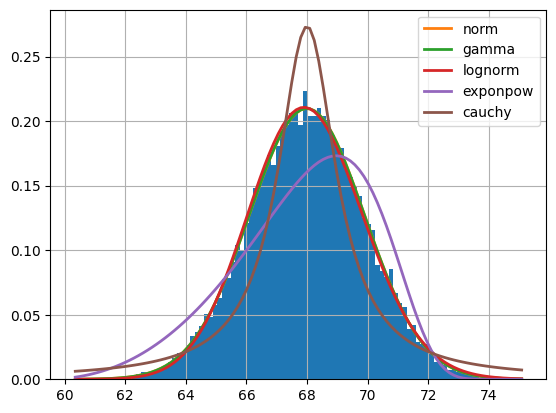

In [13]:
f.summary()

In [14]:
f.df_errors

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
expon,0.762622,605.432030,621.685293,inf,0.400054,0.000000e+00
norm,0.001538,828.260851,844.514113,inf,0.002993,9.780726e-01
uniform,0.545127,543.928861,560.182123,inf,0.259356,0.000000e+00
rayleigh,0.327417,587.405722,603.658984,inf,0.259466,0.000000e+00
powerlaw,0.529373,561.154052,585.533945,inf,0.324033,0.000000e+00
cauchy,0.077043,698.891296,715.144558,inf,0.073638,2.451128e-118
gamma,0.001547,830.585100,854.964993,inf,0.003378,9.368979e-01
chi2,0.251891,602.165726,626.545620,inf,0.192696,0.000000e+00
lognorm,0.002230,844.603492,868.983385,inf,0.008761,4.283402e-02
exponpow,0.059169,960.351128,984.731022,inf,0.066682,4.294069e-97


In [15]:
f.get_best(method = 'sumsquare_error')

{'norm': {'loc': 67.99311359679999, 'scale': 1.9016407372498432}}

### ii. Weight

In [16]:
weight = df["Weight(Pounds)"].values

In [17]:
f = Fitter(weight, distributions = get_common_distributions())
f.fit()

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
norm,0.000041,1213.030945,1229.284208,inf,0.004043,8.067684e-01
gamma,0.000044,1217.409746,1241.789639,inf,0.005563,4.199477e-01
lognorm,0.000075,1241.804768,1266.184662,inf,0.011985,1.507418e-03
chi2,0.000169,1262.928406,1287.308300,inf,0.024103,4.757672e-13
cauchy,0.002015,1068.365919,1084.619181,inf,0.072136,1.427213e-113


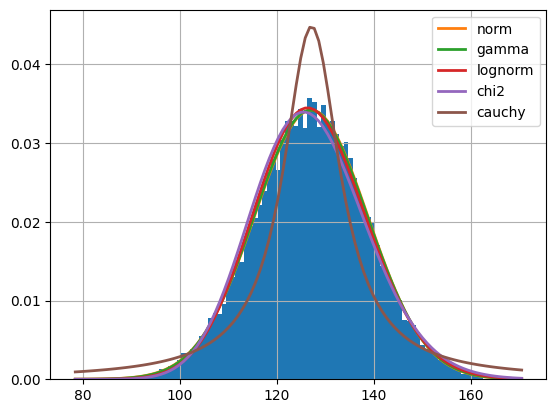

In [18]:
f.summary()

In [19]:
f.df_errors

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
norm,0.000041,1213.030945,1229.284208,inf,0.004043,8.067684e-01
expon,0.020286,971.988619,988.241881,inf,0.408194,0.000000e+00
uniform,0.014586,910.324621,926.577883,inf,0.273470,0.000000e+00
rayleigh,0.009184,952.843629,969.096892,inf,0.269426,0.000000e+00
powerlaw,0.014109,930.327353,954.707246,inf,0.328641,0.000000e+00
cauchy,0.002015,1068.365919,1084.619181,inf,0.072136,1.427213e-113
gamma,0.000044,1217.409746,1241.789639,inf,0.005563,4.199477e-01
chi2,0.000169,1262.928406,1287.308300,inf,0.024103,4.757672e-13
lognorm,0.000075,1241.804768,1266.184662,inf,0.011985,1.507418e-03
exponpow,0.038391,1426.001354,1450.381248,inf,0.916027,0.000000e+00


In [20]:
f.get_best(method = 'sumsquare_error')

{'norm': {'loc': 127.07942116080001, 'scale': 11.66066434332078}}

### Time of execution

In [21]:
end = time.time()

In [22]:
delta = (end - start)

hours = int(delta/3600)
mins = int((delta - hours*3600)/60)
segs = int(delta - hours*3600 - mins*60)
print(f'Execute this notebook take us {hours} hours, {mins} minutes and {segs} seconds.')

Execute this notebook take us 0 hours, 0 minutes and 4 seconds.
